ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

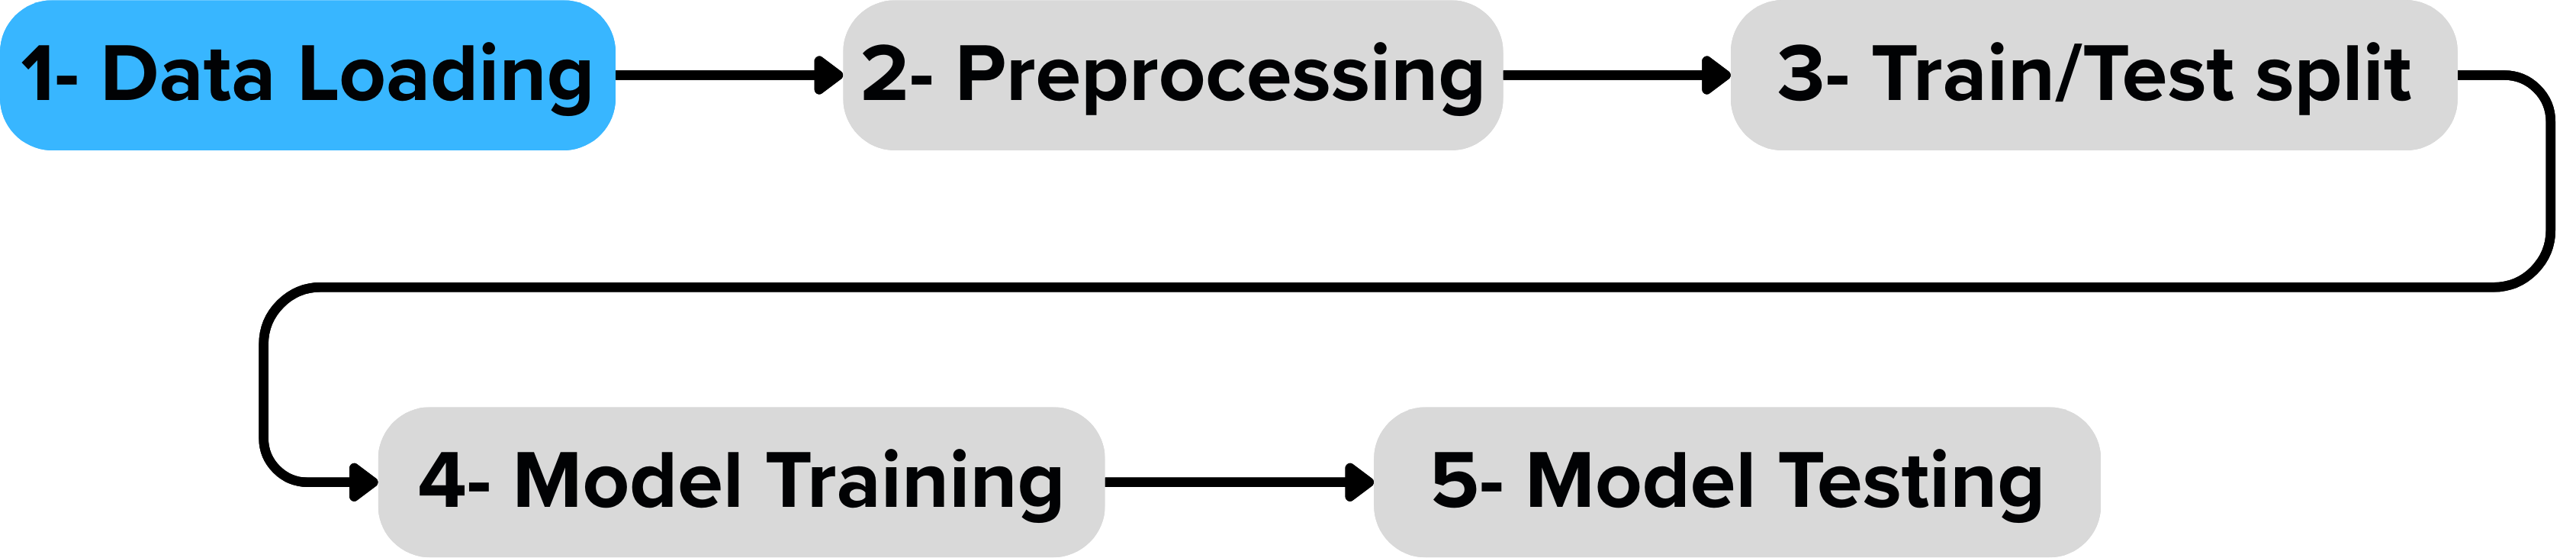

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set_theme('paper')

In [42]:
# Load Dataset

df = pd.read_csv("../data/Chocolate_Sales.csv")

# Display first 5 rows
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


### Check Missing Values

In [26]:
# Check all values
print(df.isna())

      Sales Person  Country  Product   Date  Amount  Boxes Shipped
0            False    False    False  False   False          False
1            False    False    False  False   False          False
2            False    False    False  False   False          False
3            False    False    False  False   False          False
4            False    False    False  False   False          False
...            ...      ...      ...    ...     ...            ...
3277         False    False    False  False   False          False
3278         False    False    False  False   False          False
3279         False    False    False  False   False          False
3280         False    False    False  False   False          False
3281         False    False    False  False   False          False

[3282 rows x 6 columns]


In [27]:
print(df.isna().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


### Check duplicate rows

In [ ]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [29]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (3282, 6) 

number of rows:  3282
number of columns:  6


### Data type of columns

In [30]:
# viewing the data types of columns
df.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

In [31]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Amount'] = df['Amount'].replace('[/$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])

df.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object

### Descriptive summary Statistics

In [32]:
# Statistical summary
df.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,3282,3282.000000,3282.000000
unique,25,6,22,NaN,NaN,NaN
top,Kelci Walkden,Australia,50% Dark Bites,NaN,NaN,NaN
freq,162,615,180,NaN,NaN,NaN
mean,NaN,NaN,NaN,2023-05-03 15:09:06.252284928,6030.338775,164.666971
min,NaN,NaN,NaN,2022-01-03 00:00:00,7.000000,1.000000
25%,NaN,NaN,NaN,2022-07-04 00:00:00,2521.495000,71.000000
50%,NaN,NaN,NaN,2023-05-11 00:00:00,5225.500000,137.000000
75%,NaN,NaN,NaN,2024-03-02 00:00:00,8556.842500,232.000000
max,NaN,NaN,NaN,2024-08-31 00:00:00,26170.950000,778.000000


### Univariate Analysis

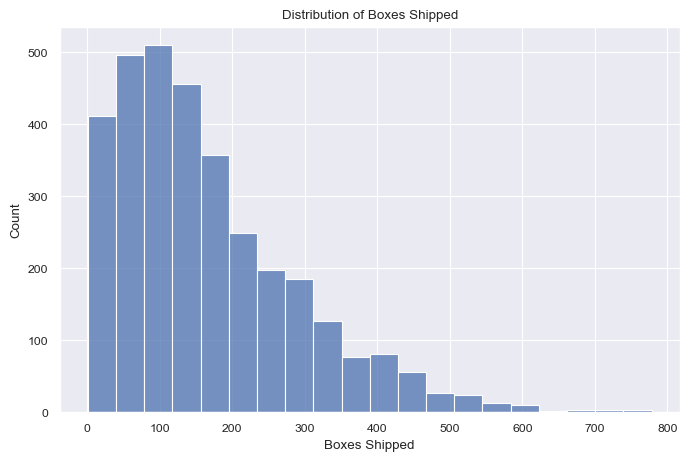

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['Boxes Shipped'], bins=20)
plt.title("Distribution of Boxes Shipped")
plt.show()

- Shows how shipment sizes are distributed
- Right skew = many small shipments, few large ones

### Distribution of Revenue

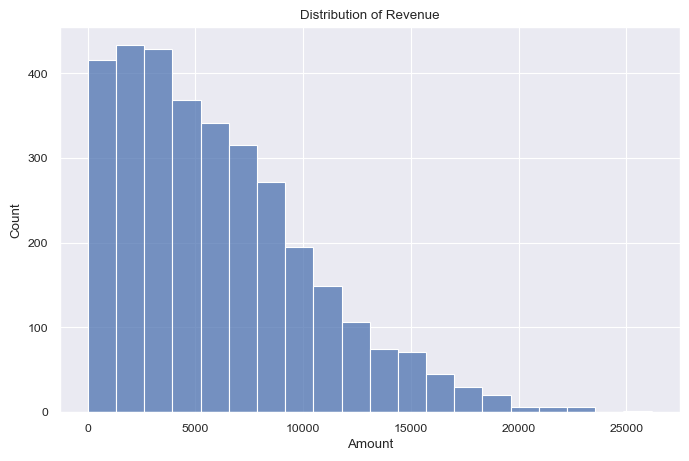

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=20)
plt.title("Distribution of Revenue")
plt.show()

## Bivariate Analysis

### Revenue by Country

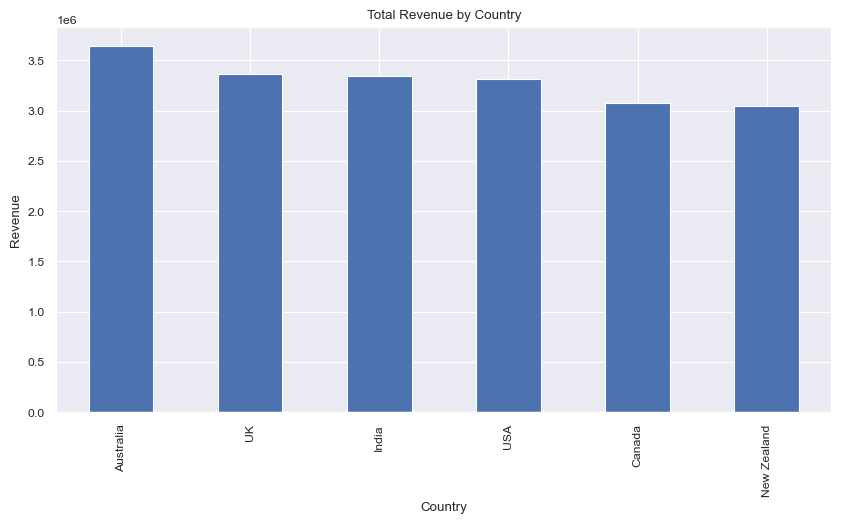

Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64

In [35]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Revenue by Country")
plt.ylabel("Revenue")
plt.show()

country_revenue

### Revenue by Product

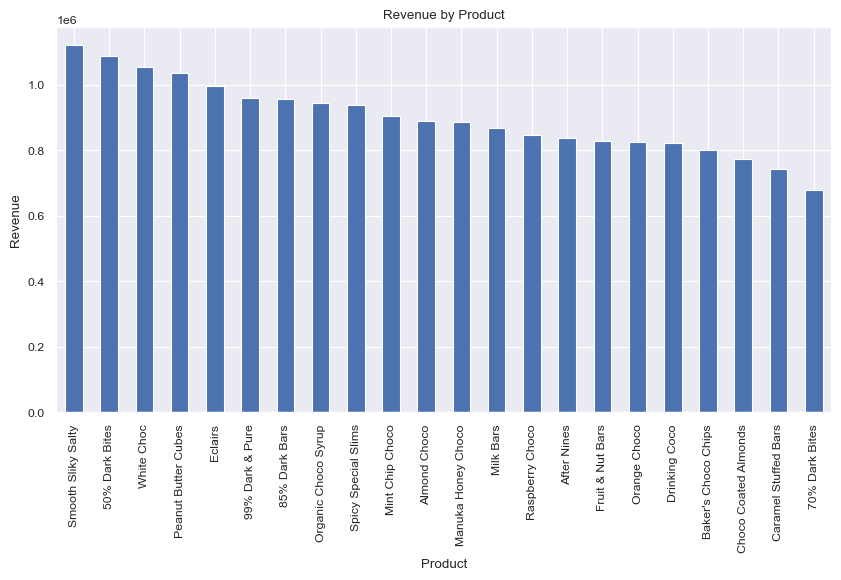

Product
Smooth Sliky Salty      1120201.09
50% Dark Bites          1087659.35
White Choc              1054257.00
Peanut Butter Cubes     1036591.09
Eclairs                  996947.96
99% Dark & Pure          960033.45
85% Dark Bars            955268.24
Organic Choco Syrup      945345.73
Spicy Special Slims      938131.69
Mint Chip Choco          904989.55
Almond Choco             890454.65
Manuka Honey Choco       885208.03
Milk Bars                866273.62
Raspberry Choco          845388.41
After Nines              837215.67
Fruit & Nut Bars         829278.96
Orange Choco             824070.85
Drinking Coco            822245.57
Baker's Choco Chips      799085.67
Choco Coated Almonds     773062.91
Caramel Stuffed Bars     742516.15
70% Dark Bites           677346.22
Name: Amount, dtype: float64

In [36]:
product_revenue = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.show()

product_revenue

### Revenue by Sales Person

In [37]:
salesperson_revenue = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

salesperson_revenue.head(10)

Sales Person
Ches Bonnell           1022599.96
Oby Sorrel             1017204.12
Madelene Upcott        1010028.72
Kelci Walkden          1002929.10
Brien Boise             997326.48
Van Tuxwell             974425.09
Dennison Crosswaite     931849.57
Beverie Moffet          892421.37
Kaine Padly             849062.76
Marney O'Breen          836427.63
Name: Amount, dtype: float64

### Boxes vs Revenue Relationship

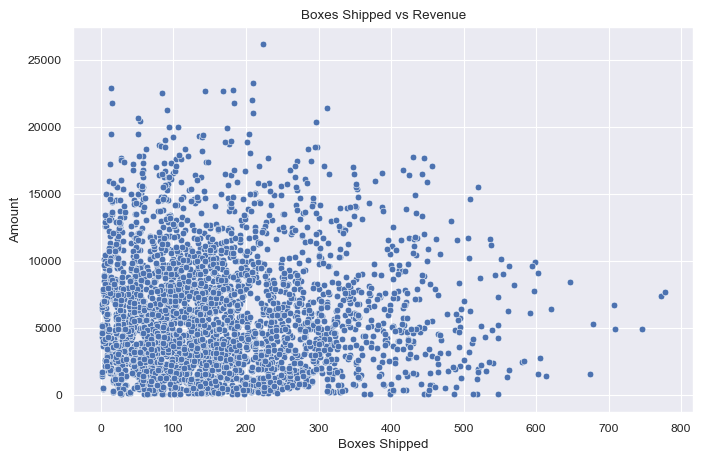

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)
plt.title("Boxes Shipped vs Revenue")
plt.show()

### Correlation Matrix

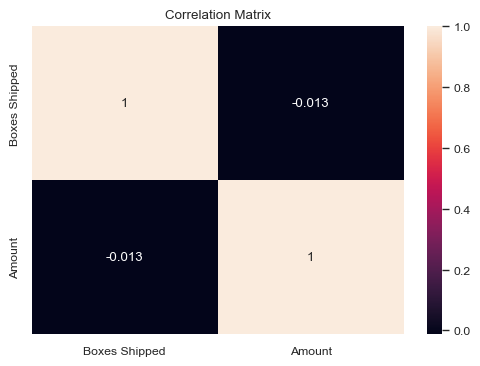

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Boxes Shipped', 'Amount']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Revenue Trend

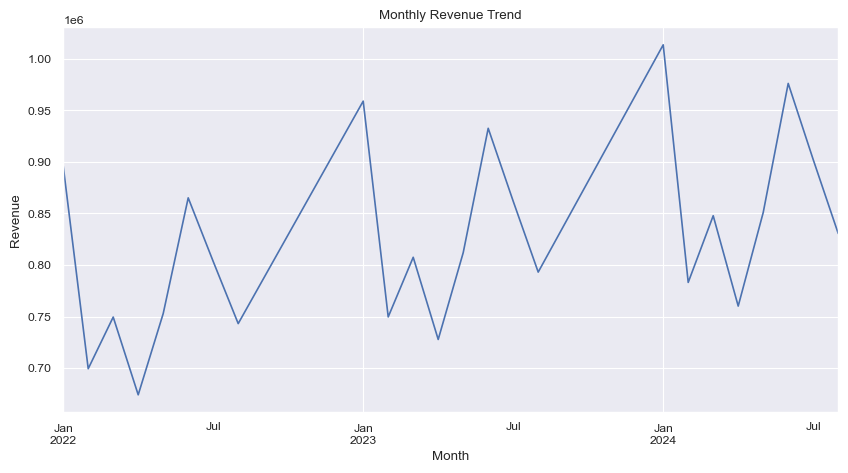

In [40]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.